In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
'hours_per_week', 'native_country', 'income']
adult_df = pd.read_csv(url, names=columns, sep=',', na_values=' ?')


# Preview the dataset
adult_df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
# Dropping rows with missing values
adult_df.dropna(inplace=True)


In [3]:
# Summary statistics
adult_df.describe()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


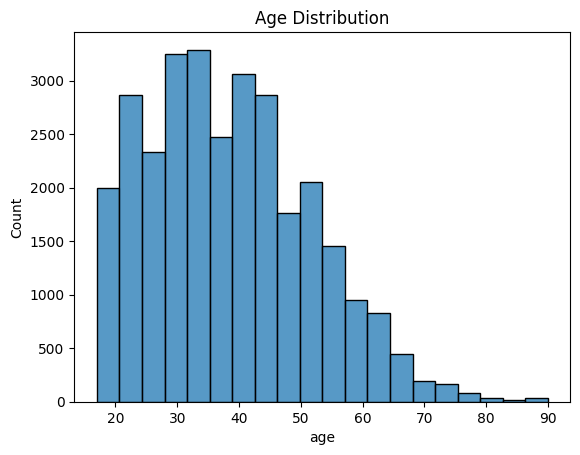

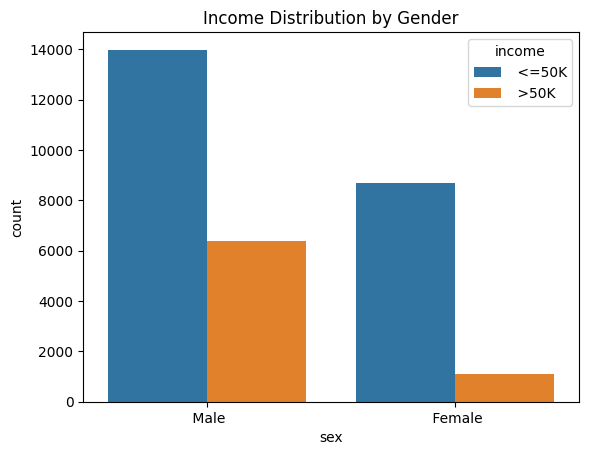

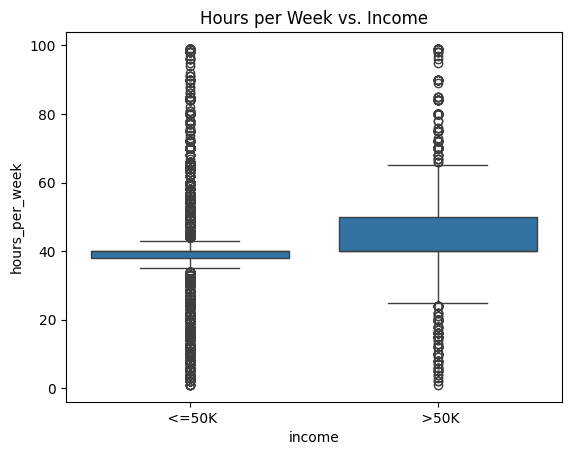

In [4]:
# Distribution of Age
sns.histplot(adult_df['age'], bins=20)
plt.title('Age Distribution')
plt.show()

# Countplot of Income by Gender
sns.countplot(x='sex', hue='income', data=adult_df)
plt.title('Income Distribution by Gender')
plt.show()

# Hours Worked vs. Income
sns.boxplot(x='income', y='hours_per_week', data=adult_df)
plt.title('Hours per Week vs. Income')
plt.show()


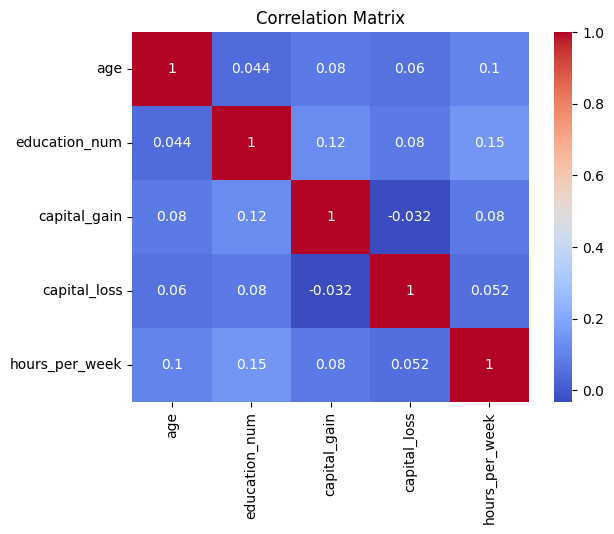

In [5]:
# Correlation Matrix for numerical columns
corr_matrix = adult_df[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']].corr()

# Heatmap of Correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


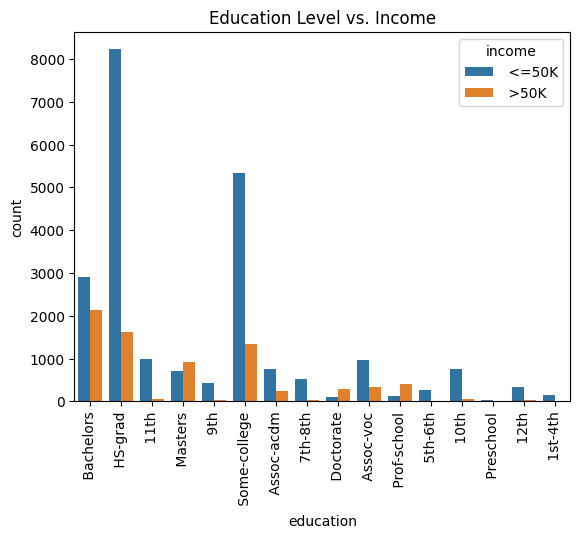

In [6]:
# Education and Income
sns.countplot(x='education', hue='income', data=adult_df)
plt.xticks(rotation=90)
plt.title('Education Level vs. Income')
plt.show()


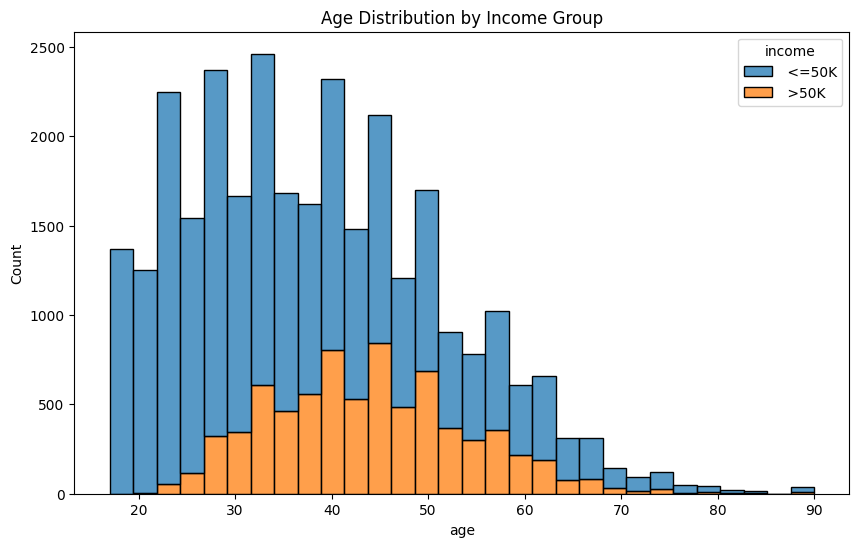

In [7]:
# Income distribution across age
plt.figure(figsize=(10,6))
sns.histplot(data=adult_df, x='age', hue='income', multiple='stack', bins=30)
plt.title('Age Distribution by Income Group')
plt.show()


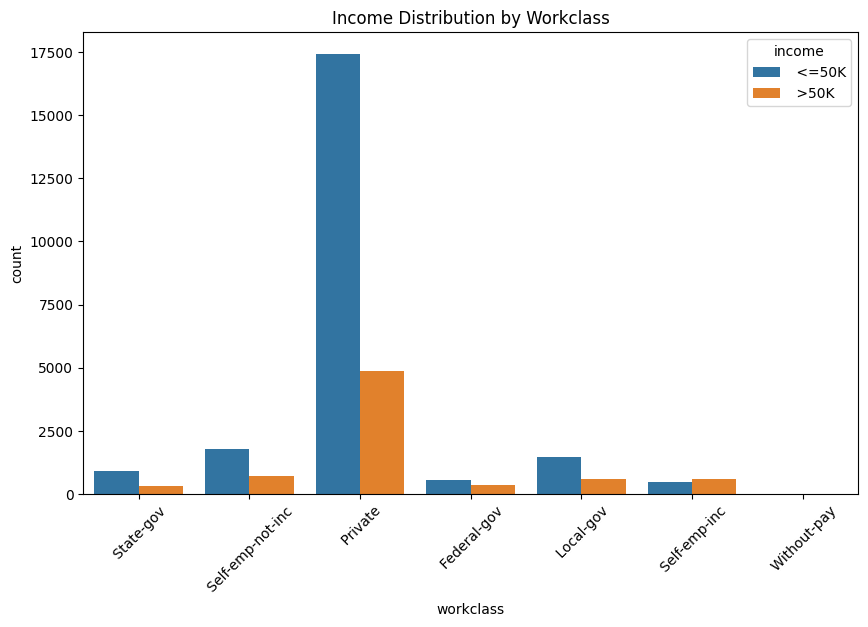

In [8]:
# Income distribution by Workclass
plt.figure(figsize=(10,6))
sns.countplot(data=adult_df, x='workclass', hue='income')
plt.xticks(rotation=45)
plt.title('Income Distribution by Workclass')
plt.show()


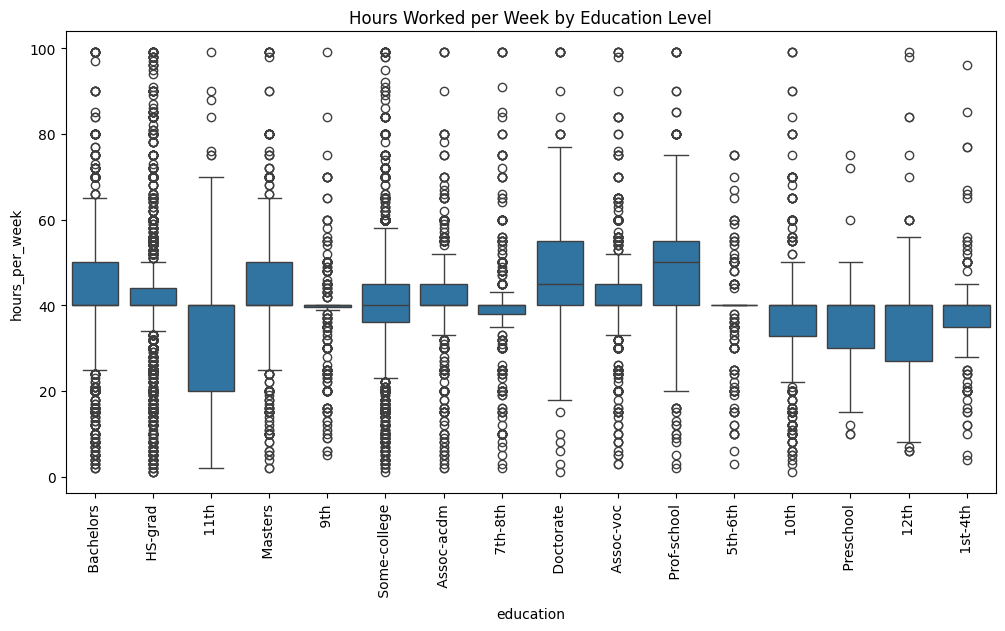

In [9]:
# Hours per week worked by Education
plt.figure(figsize=(12,6))
sns.boxplot(data=adult_df, x='education', y='hours_per_week')
plt.xticks(rotation=90)
plt.title('Hours Worked per Week by Education Level')
plt.show()


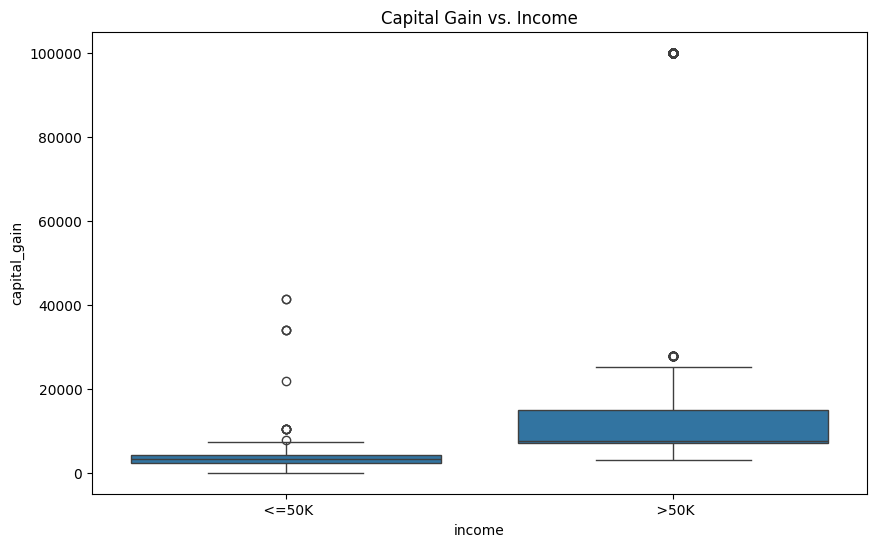

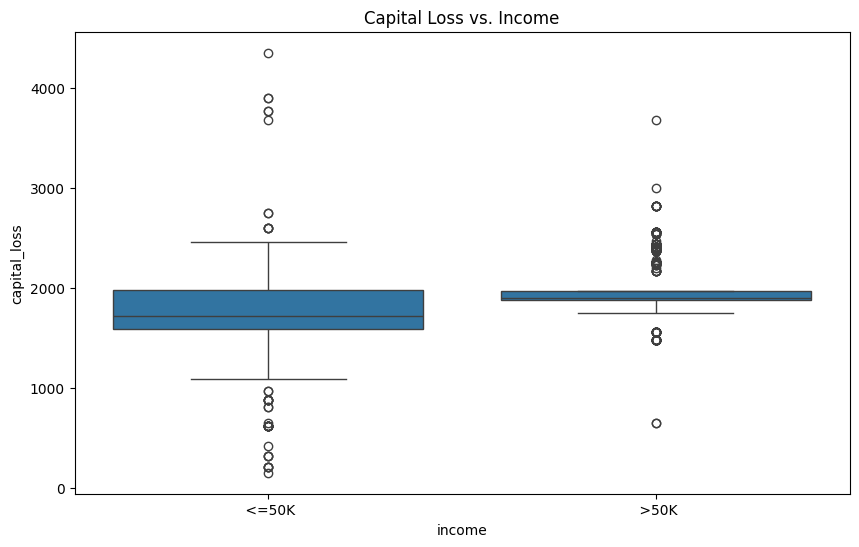

In [10]:
# Capital Gain vs. Income
plt.figure(figsize=(10,6))
sns.boxplot(data=adult_df[adult_df['capital_gain'] > 0], x='income', y='capital_gain')
plt.title('Capital Gain vs. Income')
plt.show()

# Capital Loss vs. Income
plt.figure(figsize=(10,6))
sns.boxplot(data=adult_df[adult_df['capital_loss'] > 0], x='income', y='capital_loss')
plt.title('Capital Loss vs. Income')
plt.show()


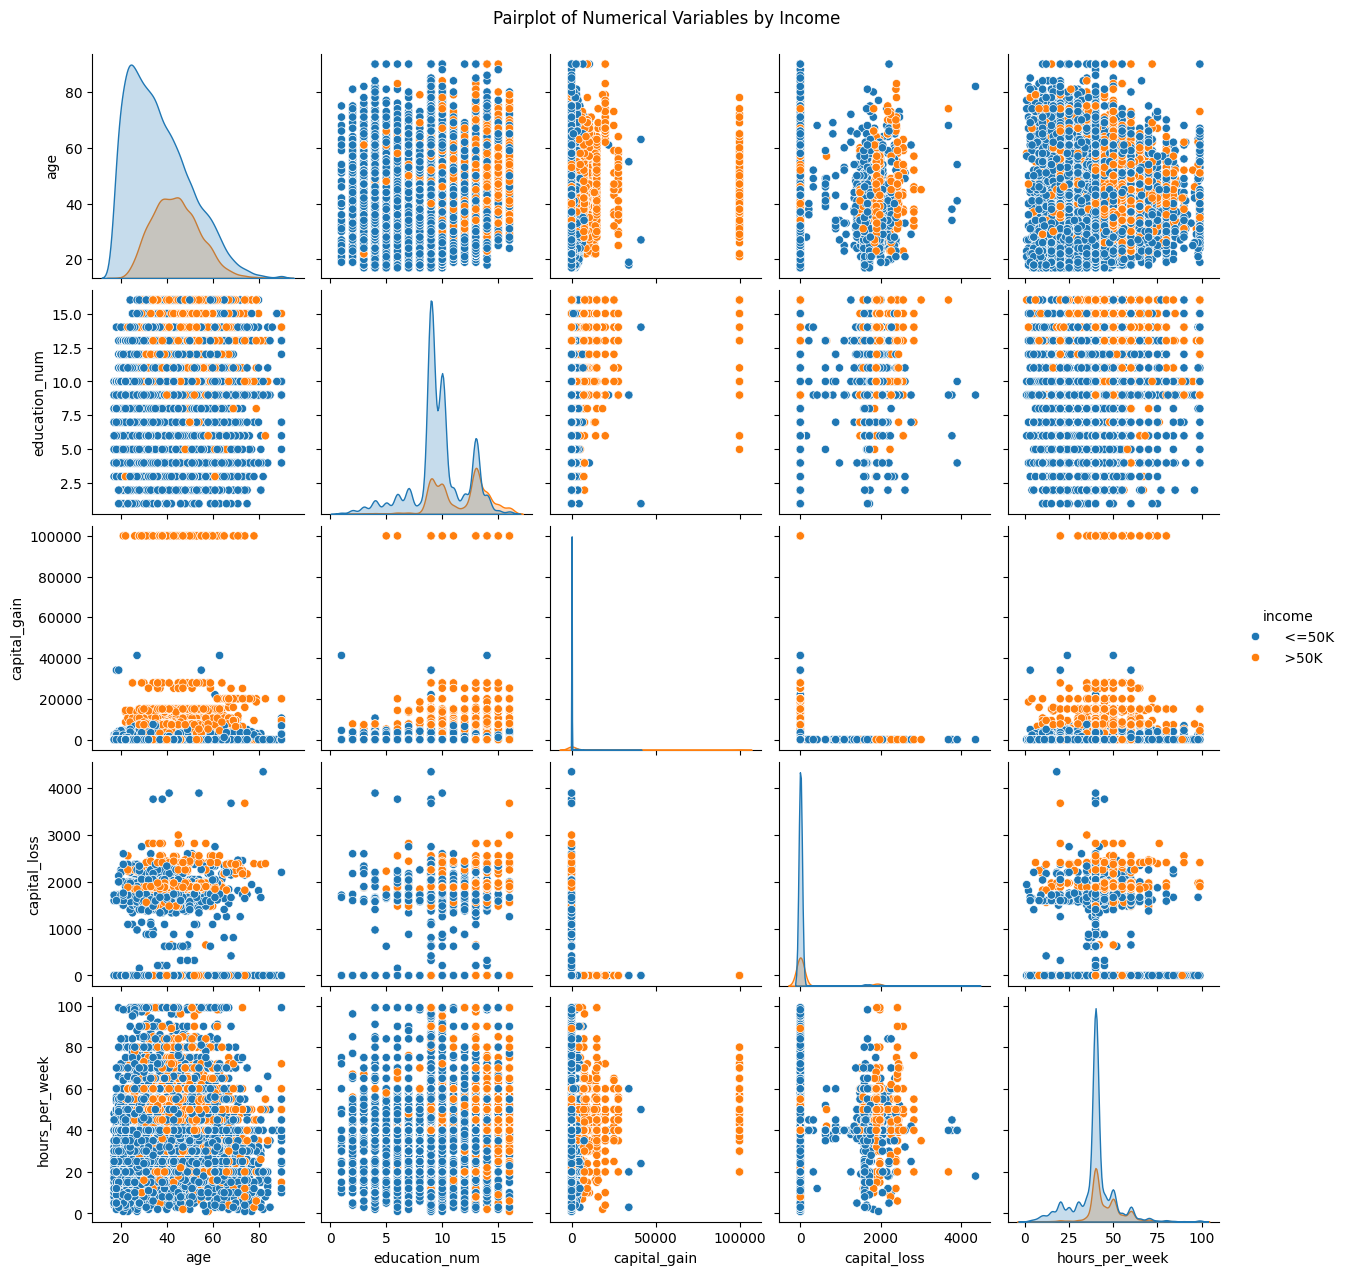

In [11]:
# Pairplot for numerical features
sns.pairplot(adult_df[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income']], hue='income')
plt.suptitle('Pairplot of Numerical Variables by Income', y=1.02)
plt.show()


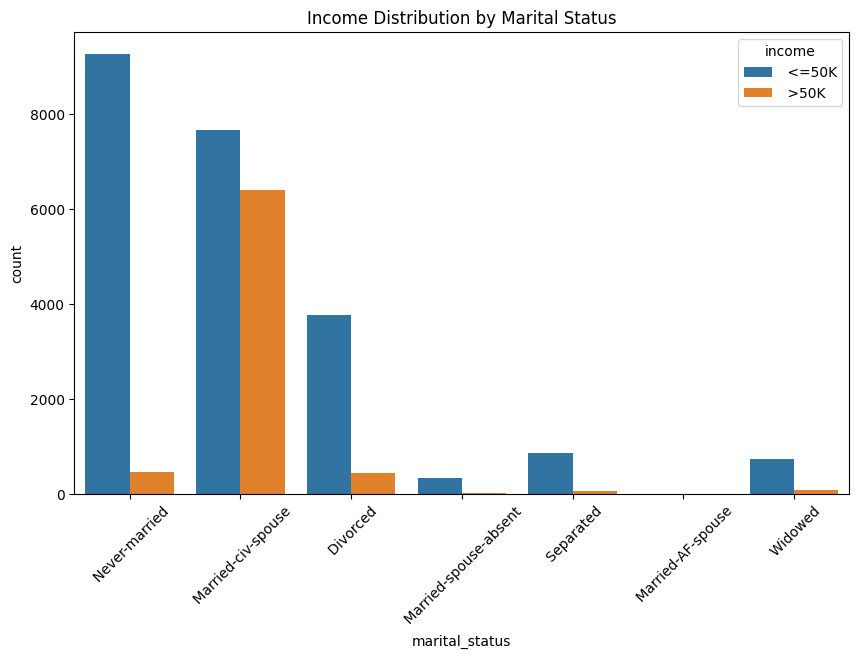

In [12]:
# Marital Status vs Income
plt.figure(figsize=(10,6))
sns.countplot(data=adult_df, x='marital_status', hue='income')
plt.xticks(rotation=45)
plt.title('Income Distribution by Marital Status')
plt.show()


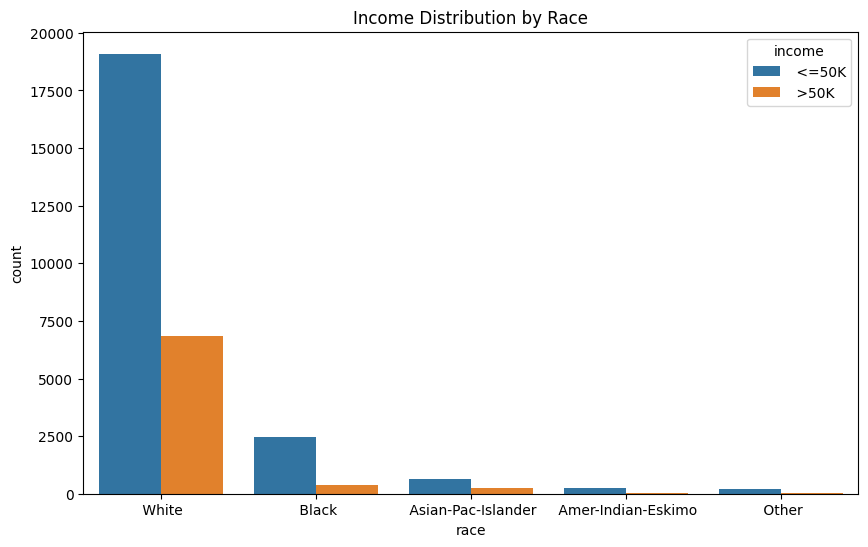

In [13]:
# Race vs. Income
plt.figure(figsize=(10,6))
sns.countplot(data=adult_df, x='race', hue='income')
plt.title('Income Distribution by Race')
plt.show()


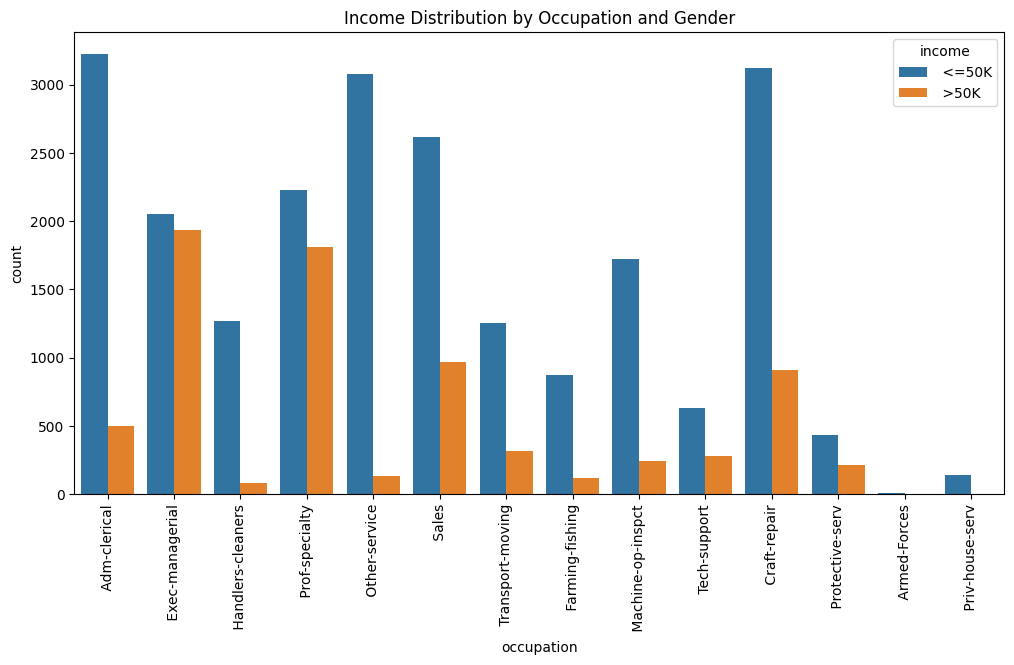

In [14]:
# Gender and Occupation vs. Income
plt.figure(figsize=(12,6))
sns.countplot(data=adult_df, x='occupation', hue='income')
plt.xticks(rotation=90)
plt.title('Income Distribution by Occupation and Gender')
plt.show()


In [15]:
# Encode categorical variables


categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
adult_df = pd.get_dummies(adult_df, columns=categorical_cols)


# Feature engineering: Creating new features (e.g., net_capital = capital_gain - capital_loss)
adult_df['net_capital'] = adult_df['capital_gain'] - adult_df['capital_loss']

# Drop original columns used in feature engineering
adult_df.drop(['capital_gain', 'capital_loss'], axis=1, inplace=True)


In [16]:
# Standardizing numeric features for clustering and PCA
scaler = StandardScaler()
numeric_cols = ['age', 'fnlwgt', 'education_num', 'hours_per_week', 'net_capital']
adult_df[numeric_cols] = scaler.fit_transform(adult_df[numeric_cols])

In [17]:
# Checking multicollinearity with VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_cols
vif_data['VIF'] = [variance_inflation_factor(adult_df[numeric_cols].values, i) for i in range(len(numeric_cols))]
print(vif_data)

          Feature       VIF
0             age  1.021378
1          fnlwgt  1.007888
2   education_num  1.038456
3  hours_per_week  1.036458
4     net_capital  1.022918


Explained Variance by each component: [0.26127145 0.20477986]


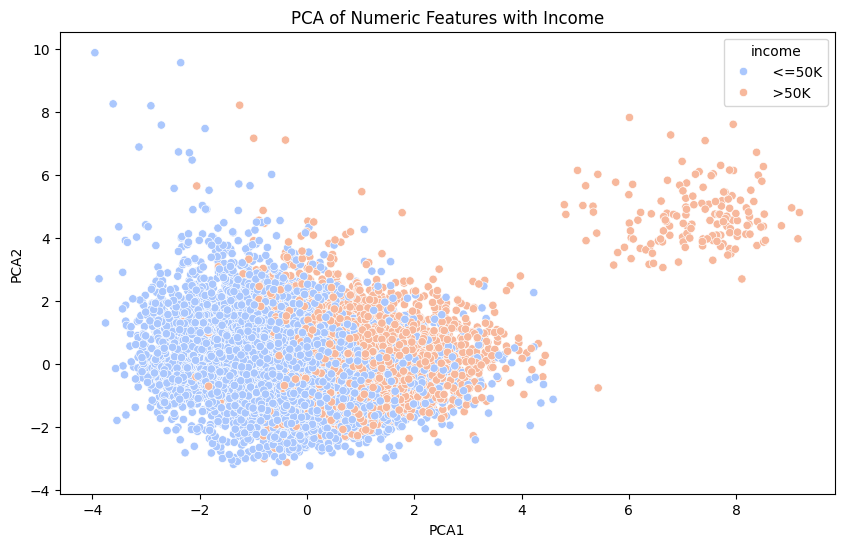

In [18]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(adult_df[numeric_cols])
adult_df['PCA1'] = pca_data[:, 0]
adult_df['PCA2'] = pca_data[:, 1]

explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by each component: {explained_variance}')


# Visualizing PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='income', data=adult_df, palette='coolwarm')
plt.title('PCA of Numeric Features with Income')
plt.show()

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


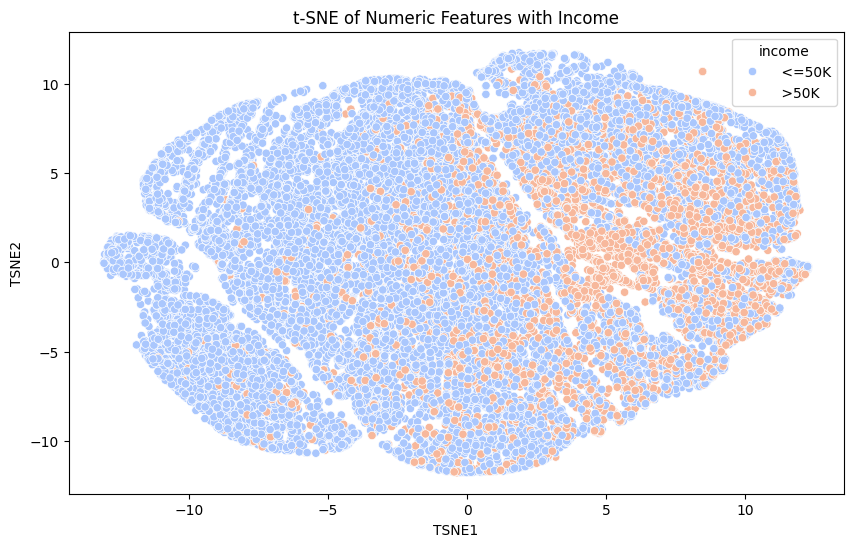

In [19]:
# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=50, n_iter=300)
tsne_data = tsne.fit_transform(adult_df[numeric_cols])
adult_df['TSNE1'] = tsne_data[:, 0]
adult_df['TSNE2'] = tsne_data[:, 1]

tsne = TSNE(n_components=2, perplexity=50, n_iter=300, random_state=42)


# Visualizing t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='income', data=adult_df, palette='coolwarm')
plt.title('t-SNE of Numeric Features with Income')
plt.show()

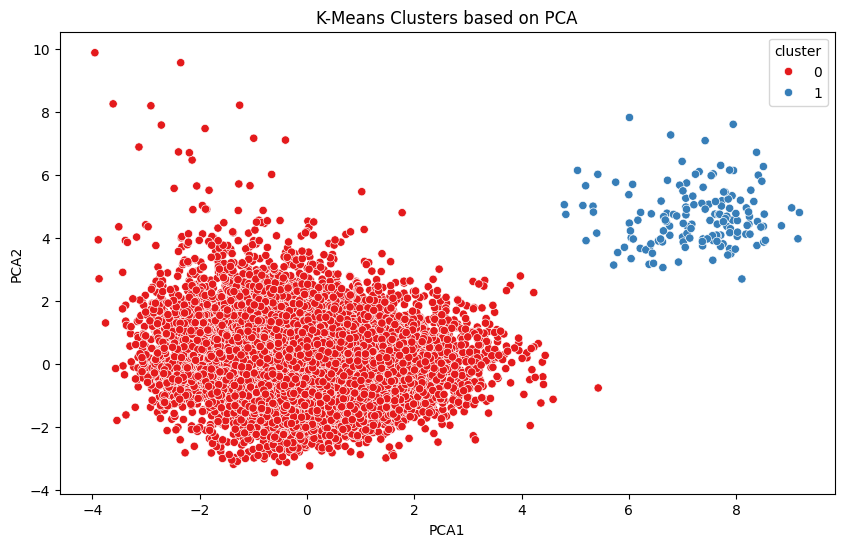

In [20]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
adult_df['cluster'] = kmeans.fit_predict(adult_df[numeric_cols])



# Visualizing clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='Set1', data=adult_df)
plt.title('K-Means Clusters based on PCA')
plt.show()

In [21]:
# Silhouette score for cluster evaluation
silhouette_avg = silhouette_score(adult_df[numeric_cols], adult_df['cluster'])
print(f'Silhouette Score for K-Means clustering: {silhouette_avg}')


Silhouette Score for K-Means clustering: 0.8084513583111507


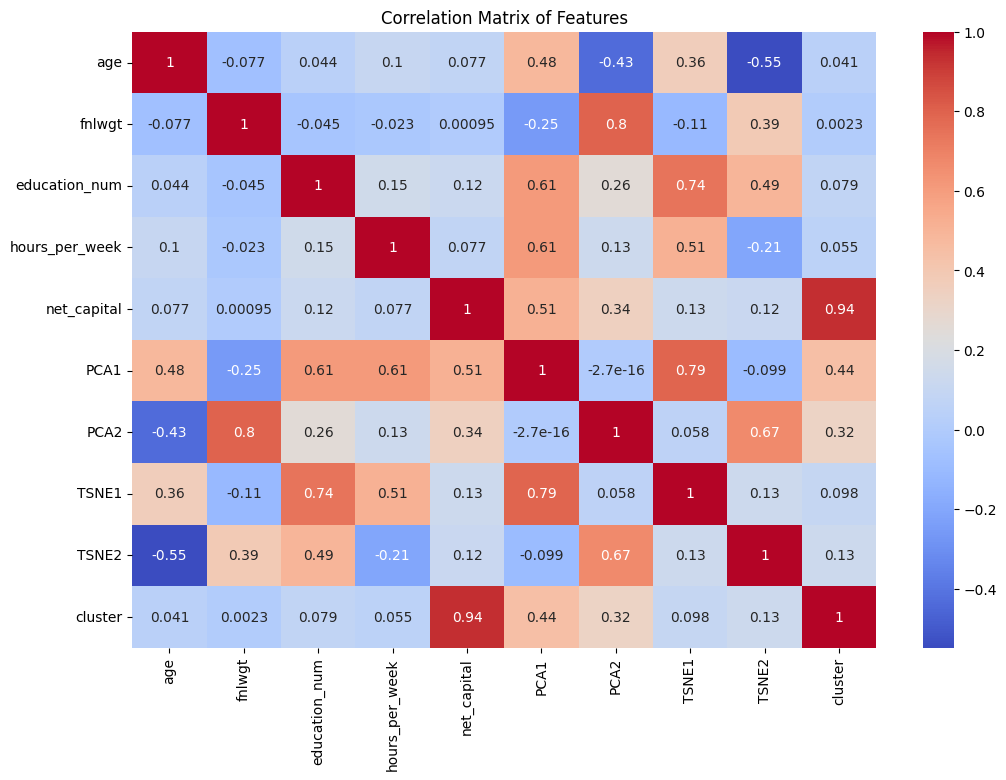

In [27]:
# Select only numeric columns for the correlation matrix
numeric_cols = adult_df.select_dtypes(include=[float, int])

# Correlation Matrix
corr_matrix = numeric_cols.corr()

# Heatmap of Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

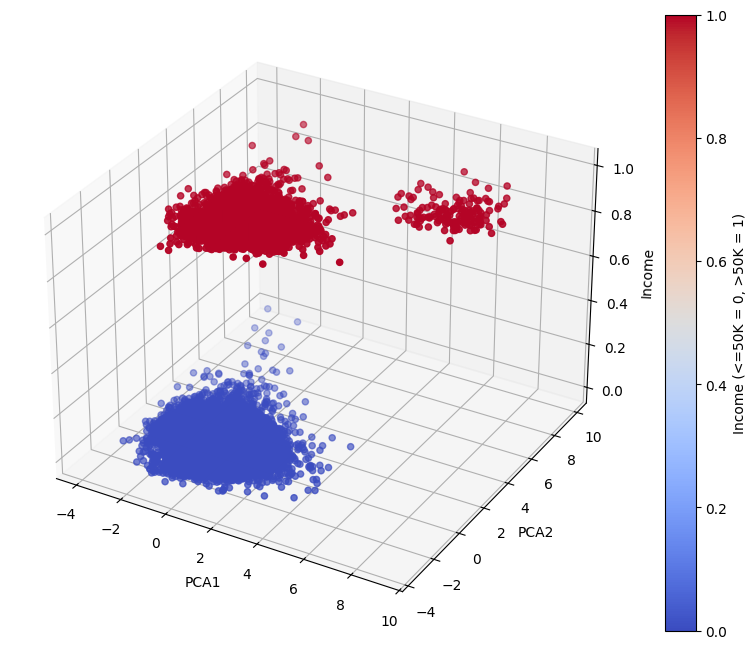

In [29]:
# Map the income column to numeric values
adult_df['income_numeric'] = adult_df['income'].map({' <=50K': 0, ' >50K': 1})

# 3D scatter plot with mapped numeric values for color
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the numeric income values for coloring
scatter = ax.scatter(adult_df['PCA1'], adult_df['PCA2'], adult_df['income_numeric'], 
                     c=adult_df['income_numeric'], cmap='coolwarm')

# Label axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('Income')

# Add a color bar to indicate income groups
plt.colorbar(scatter, ax=ax, label='Income (<=50K = 0, >50K = 1)')
plt.show()
